# Hierarchical Clustering

The problem that we are going to solve in this section is to segment customers into different groups based on their shopping trends.

In [1]:
#import the desired libraries
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:
customer_data = pd.read_csv('E:\\Resolve6_Training\\DS_ML\\Sample Data Sets\\hierarchical-clustering-shopping-data.csv')
customer_data.shape
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns.

In [3]:
data = customer_data.iloc[:, 3:5].values
print(data)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

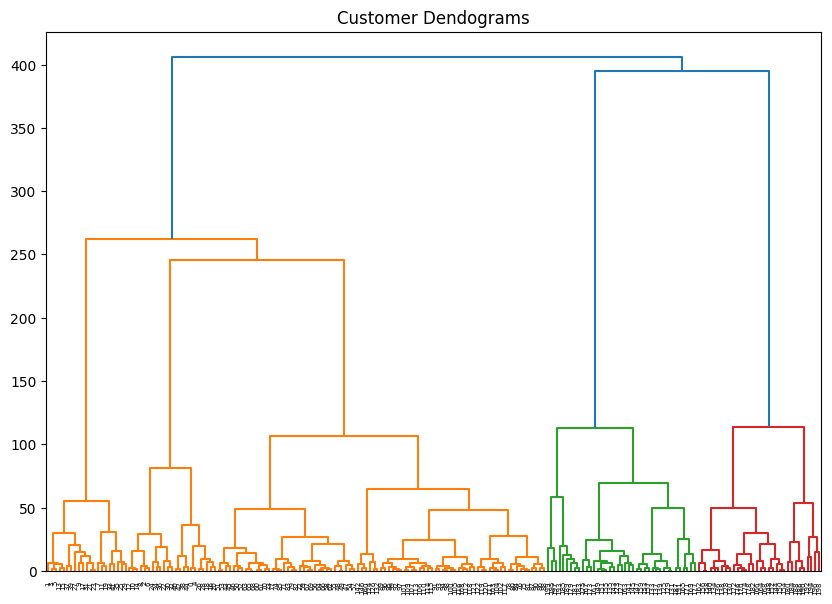

In [4]:
#We will use the scipy library to create the dendrograms for our dataset.
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.savefig("Dendogram.jpg",dpi=300)

Now we know the number of clusters for our dataset, the next step is to group the data points into these five clusters.

In [13]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 1, 8, 1, 4, 1, 8, 1, 8, 1, 8, 1, 8, 1, 8, 1, 4, 1, 4, 1, 4, 1,
       8, 1, 8, 1, 4, 1, 4, 1, 8, 1, 8, 1, 8, 1, 8, 1, 4, 1, 4, 1, 4, 7,
       4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 7, 0, 7, 0, 0, 7, 7, 0, 7, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 3, 0, 9, 5, 3, 5, 3,
       0, 3, 5, 9, 5, 3, 5, 3, 5, 9, 0, 9, 5, 9, 0, 3, 5, 9, 5, 9, 5, 3,
       5, 9, 5, 3, 5, 3, 0, 9, 5, 9, 5, 3, 5, 9, 5, 3, 5, 3, 5, 9, 5, 9,
       5, 3, 5, 2, 6, 2, 5, 2, 6, 2, 6, 3, 6, 2, 6, 3, 6, 2, 6, 2, 6, 2,
       6, 2], dtype=int64)

In [14]:
#cluster.inertia_

You can see the cluster labels from all of your data points. Since we had five clusters, we have five labels in the output i.e. 0 to 4.

As a final step, let's plot the clusters to see how actually our data has been clustered

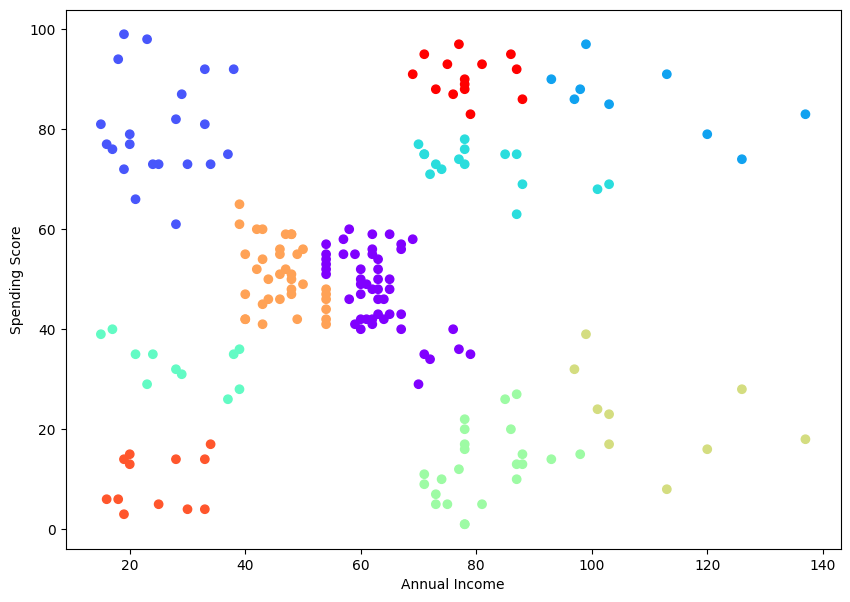

In [15]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.savefig("Buying.jpg",dpi=300)
plt.show()